Q1. What is the mathematical formula for a linear SVM?

ans->The mathematical formula for a linear Support Vector Machine (SVM) can be represented as:

 f(x) = ( transpose(w) * x + b)

Where:

f(x)is the decision function.

w is the weight vector.

x is the input vector.

b is the bias term.

Q2. What is the objective function of a linear SVM?

ans->The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class.

The function to be optimized in SVM is: min w,b (1/2)∥w∥^2  subject to the constraint: y( transpose(w) * x + b) >=1

Q3. What is the kernel trick in SVM?

ans->The kernel trick in SVM allows for finding non-linear decision boundaries by implicitly mapping data into higher-dimensional feature spaces using kernel functions, without explicitly computing the transformation.

Q4. What is the role of support vectors in SVM Explain with example

ans->Support vectors are crucial data points that determine the position and orientation of the decision boundary in SVM. They are the closest points to the margin and influence the hyperplane's construction.

For example, consider a simple scenario with two classes, represented by red and blue points on a 2D plane. The SVM aims to find the optimal hyperplane that separates these two classes. In this case, the support vectors would be the data points that lie closest to the decision boundary, typically on or near the margin. These points directly influence the positioning and orientation of the hyperplane.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

ans->Hyperplane:

Consider a dataset with two classes (blue and red points) that are linearly separable.
The hyperplane is the decision boundary that separates these two classes.


Margin:

The margin is the region between the hyperplane and the nearest data points (support vectors).
It is important for generalization and helps in maximizing the separation between classes.


Hard Margin:

In a hard margin SVM, the goal is to find the hyperplane that perfectly separates the classes with no misclassifications.
This works well when the data is linearly separable, but it may not be feasible or optimal in all cases.


Soft Margin:

In a soft margin SVM, some misclassifications are allowed to achieve a better generalization when the data is not perfectly separable.
It introduces a penalty for misclassifications, allowing for a more flexible decision boundary.


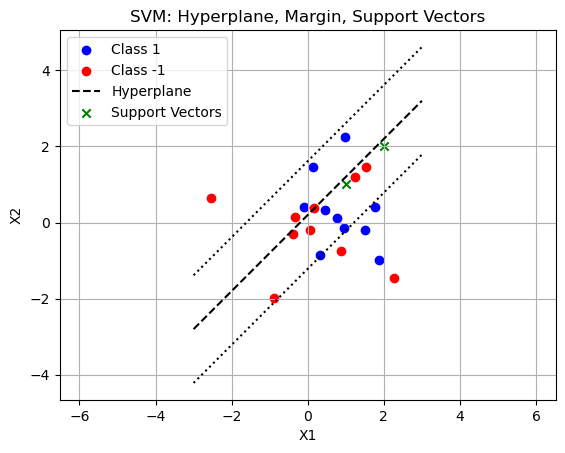

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.randn(20, 2)
y = np.array([1] * 10 + [-1] * 10)

# Define the hyperplane
w = np.array([0.5, -0.5])
b = 0.1

# Calculate the margins
margin = 1 / np.linalg.norm(w)

# Define the support vectors
support_vectors = np.array([[1, 1], [2, 2]])

# Plot the data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

# Plot the hyperplane
x_hyperplane = np.linspace(-3, 3, 10)
y_hyperplane = (-w[0] * x_hyperplane - b) / w[1]
plt.plot(x_hyperplane, y_hyperplane, color='black', linestyle='--', label='Hyperplane')

# Plot the margin lines
plt.plot(x_hyperplane, y_hyperplane + margin, 'k:')
plt.plot(x_hyperplane, y_hyperplane - margin, 'k:')

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', label='Support Vectors', marker='x')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM: Hyperplane, Margin, Support Vectors')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()



Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy: 0.9


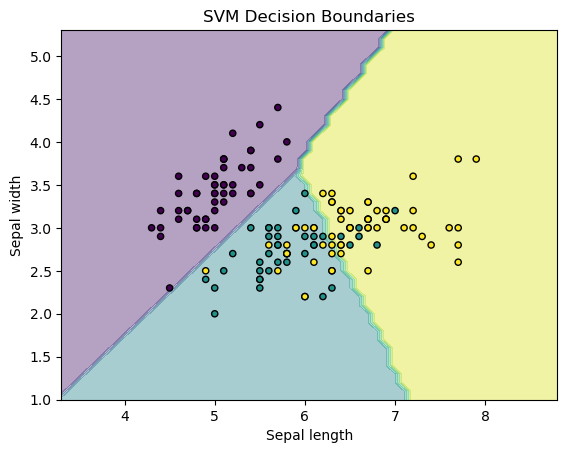

Accuracy with C=0.1: 0.8333333333333334
Accuracy with C=1: 0.9
Accuracy with C=10: 0.9


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for visualization purposes
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()

# Try different values of the regularization parameter C
C_values = [0.1, 1, 10]
for C in C_values:
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}:", accuracy)


Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = np.where(linear_model >= 0, 1, -1)

            # hinge loss
            cost = np.maximum(0, 1 - y * linear_model)
            gradient_weights = -2 * np.dot(X.T, y * cost)
            gradient_bias = -2 * np.sum(y * cost)

            # regularization
            gradient_weights += 2 * self.lambda_param * self.weights

            # update parameters
            self.weights -= self.lr * gradient_weights
            self.bias -= self.lr * gradient_bias

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return np.where(linear_model >= 0, 1, -1)

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = np.where(iris.target == 0, -1, iris.target)  # Convert labels to -1 and 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear SVM classifier from scratch
svm_scratch = LinearSVM()
svm_scratch.fit(X_train, y_train)
y_pred_scratch = svm_scratch.predict(X_test)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy of Linear SVM from scratch:", accuracy_scratch)

# Train linear SVM classifier using scikit-learn
from sklearn.svm import SVC
svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy of Linear SVM using scikit-learn:", accuracy_sklearn)


Accuracy of Linear SVM from scratch: 0.3333333333333333
Accuracy of Linear SVM using scikit-learn: 1.0


/tmp/ipykernel_109/2269980482.py:25: RuntimeWarning: overflow encountered in multiply
  gradient_weights = -2 * np.dot(X.T, y * cost)
/tmp/ipykernel_109/2269980482.py:32: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * gradient_weights
